Парная линейная регрессия
Цель работы
    Познакомиться с моделью парной линейной регрессии регрессии и методом градиентного спуска.

Содержание работы
Найти оценки параметров модели парной линейной регрессии прямыми вычислениями и палучить с помощью модели прогнозы результативного прознака.
Найти оценки параметров модели парной линейной регрессии с использованием метода градиентного спуска.
Оценить качество построенной модели, сравнив на графике обучающую выборку и прогнозы.
Построить кривые обучения.

In [1]:
#Загрузим необходимые библиотеки
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [186]:
#Исходные данные: x - расходы на рекламу, Y - объемы продаж
x = np.array([3, 5, 7, 6, 9])
Y = np.array([3, 7, 11, 14, 15])
display(x, Y)

array([3, 5, 7, 6, 9])

array([ 3,  7, 11, 14, 15])

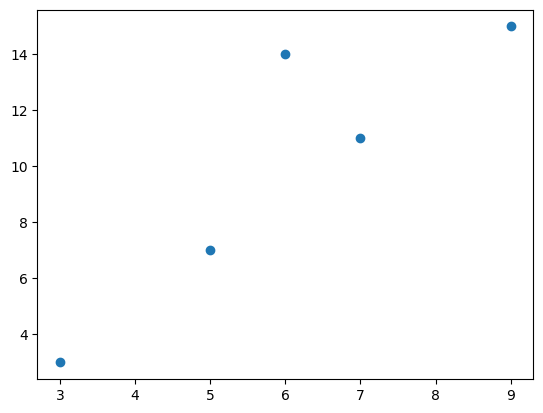

In [187]:
#Изобразим их на графике
plt.figure()
plt.scatter(x, Y)
plt.show()

In [188]:
#Вычислим оценки коэффициентов парной линейной регрессии по формулам
a1 = ((x - x.mean())*(Y - Y.mean())).mean()/((x - x.mean())**2).mean()
a0 = Y.mean() - a1*x.mean()
print("Модель линейной регрессии: Y^ = ", a0, " + ", a1, "* x")

Модель линейной регрессии: Y^ =  -2.0  +  2.0 * x


In [147]:
#Дадим серию прогнозов Y^ для x от 3 до 9 с шагом 1
x_space = np.linspace(3, 9, 7)
print(x_space)
Y_pred = a0 + a1*x_space
print(Y_pred)

[3. 4. 5. 6. 7. 8. 9.]
[ 4.  6.  8. 10. 12. 14. 16.]


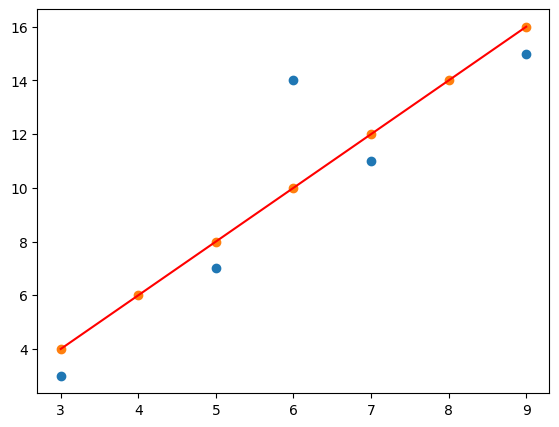

In [148]:
#Изобразим на графике исходные данные и прогнозы
fig  = plt.figure()
ax = fig.add_axes([0.1, 0.1, 0.8, 0.8])
ax.scatter(x, Y)
ax.plot(x_space, Y_pred, 'r')
ax.scatter(x_space, Y_pred)

In [189]:
#Реализуем шаг градиентного спуска в модели парной лдинейной регрессии
class SimpleRegression(object):
    def __init__(self):
        self.a0 = 0
        self.a1 = 0
    def predict(self, x):
        return self.a0 + self.a1*x
    def MSE(self, x, Y):
        return ((self.predict(x)-Y)**2).mean()
    def fit(self, x, Y):
        alpha = 0.1
        dT_a0 = -2*sum((Y -self.predict(x)))
        dT_a1 = -2*sum((Y -self.predict(x))*x)
        self.a0 -= alpha*dT_a0
        self.a1 -= alpha*dT_a1

In [190]:
#Получим прогнозы до градиентного спуска с начальными значениями параметров
regr = SimpleRegression()
print(regr.predict(3))
print(regr.predict(5))
print(regr.predict(7))
print(regr.predict(6))
print(regr.predict(9))
print(regr.MSE(x, Y))

0
0
0
0
0
120.0


---


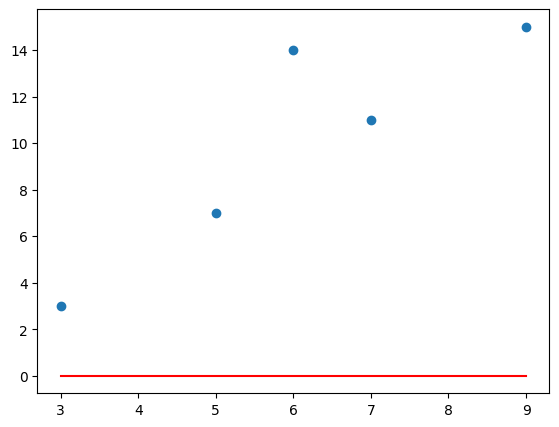

In [191]:
#Выведем прогнозы до градиентного спуска на графике
x_space = np.linspace(3, 9, 7)
Y_pred = regr.predict(x_space)
fig = plt.figure()
ax = fig.add_axes([0.1, 0.1, 0.8, 0.8])
ax.scatter(x, Y)
ax.plot(x_space, Y_pred, 'r')

MSE после первого шага градиентного спуска:  183892.0


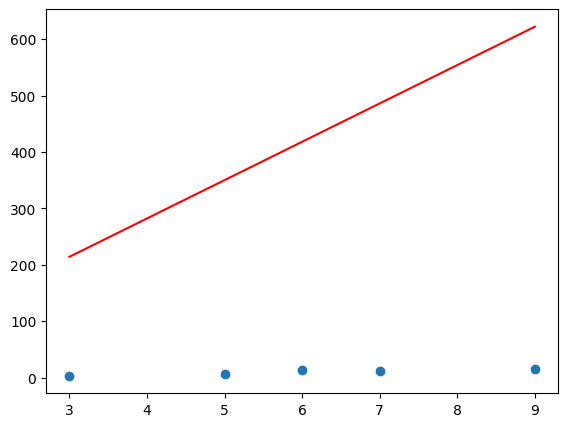

In [192]:
#Реализуем шаг градиентного спуска
regr.fit(x, Y)
print("MSE после первого шага градиентного спуска: ", regr.MSE(x, Y))
Y_pred = regr.predict(x_space)
fig = plt.figure()
ax = fig.add_axes([0.1, 0.1, 0.8, 0.8])
ax.scatter(x, Y)
ax.plot(x_space, Y_pred, 'r')

In [225]:
#Реализуем цикл градиентного спуска
class SimpleRegression(object):
    def __init__(self):
        self.a0 = 0
        self.a1 = 0
    def predict(self, x):
        return self.a0 + self.a1*x
    def MSE(self, x, Y):
        return ((Y - self.predict(x))**2).mean()
    def MAE(self, x, Y):
        return abs(Y - self.predict(x)).mean()
    def MAPE(self, x, Y):
        return abs((Y - self.predict(x))/Y).mean()
    def fit(self, x, Y, alpha = 0.001, epsylon = 0.01, max_steps = 5000):
        steps, errors = [], []
        step = 0
        for _ in range(max_steps):
            dT_a0 = -2*sum((Y -self.predict(x)))
            dT_a1 = -2*sum((Y -self.predict(x))*x)
            self.a0 -= alpha*dT_a0
            self.a1 -= alpha*dT_a1
            new_error = self.MSE(x, Y)
            step += 1
            steps.append(step)
            errors.append(new_error)
            if new_error < epsylon:
                break
        return steps, errors

In [230]:
#Запустим цикл градиентного спуска с заданной точностью 5
regr = SimpleRegression()
steps, errors = regr.fit(x, Y, alpha = 0.001, epsylon = 5)
print(regr.predict(1))

nan


nan
nan
nan
nan
nan
MSE после градиентного спуска:  nan


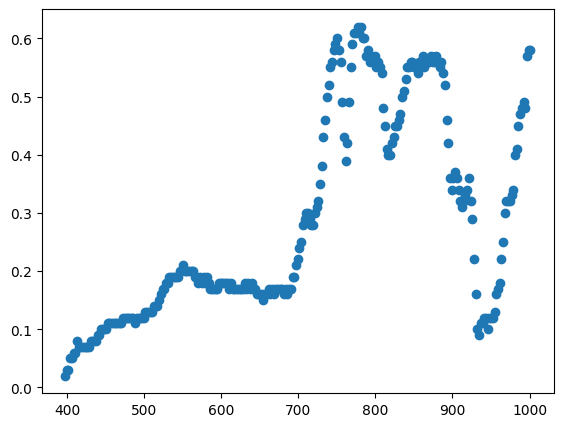

In [231]:
#Выведем график  прогнозов и вычислим MSE
print(regr.predict(3))
print(regr.predict(5))
print(regr.predict(7))
print(regr.predict(6))
print(regr.predict(9))
print("MSE после градиентного спуска: ", regr.MSE(x, Y))
Y_pred = regr.predict(x_space)
fig = plt.figure()
ax = fig.add_axes([0.1, 0.1, 0.8, 0.8])
ax.scatter(x, Y)
ax.plot(x_space, Y_pred, 'r')

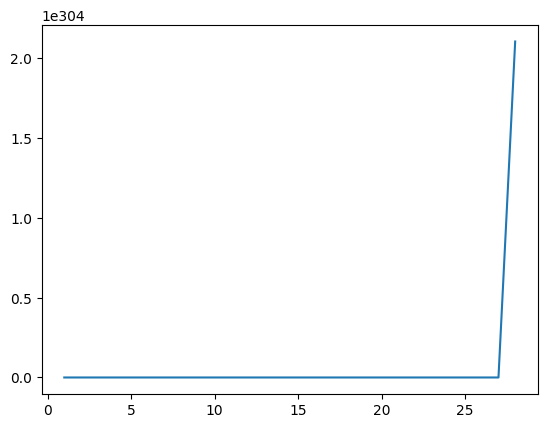

In [232]:
#Выведем график изменения MSE в процессе градиентного спуска
plt.figure()
plt.plot(steps, errors)

In [233]:
#Запустим цикл градиентного спуска с заданной точностью 0.05
regr = SimpleRegression()
steps, errors = regr.fit(x, Y, alpha = 0.001, epsylon = 0.05)

MSE после градиентного спуска:  4.1903709155046345


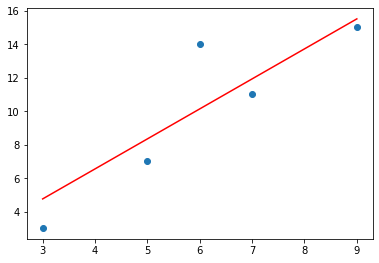

In [171]:
#Выведем график прогнозов и вычислим MSE
print("MSE после градиентного спуска: ", regr.MSE(x, Y))
Y_pred = regr.predict(x_space)
fig = plt.figure()
ax = fig.add_axes([0.1, 0.1, 0.8, 0.8])
ax.scatter(x, Y)
ax.plot(x_space, Y_pred, 'r')

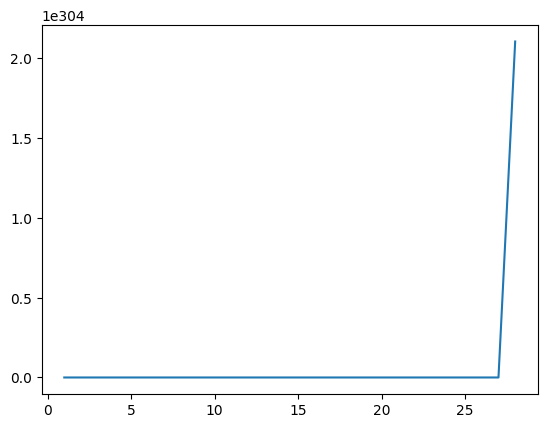

In [237]:
#Выведем график изменения MSE в процессе градиентного спуска
plt.figure()
plt.plot(steps, errors)

MSE после градиентного спуска:  nan


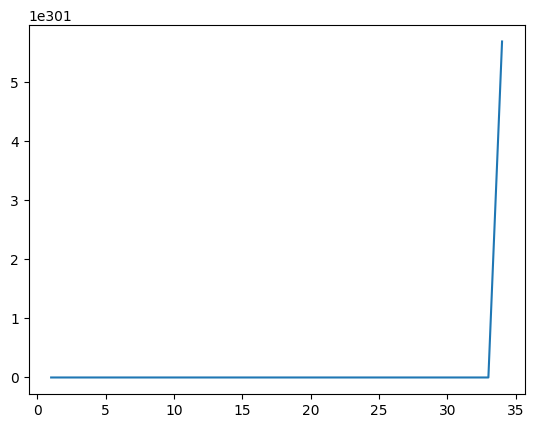

In [241]:
#Запустим цикл градиентного спуска с разными значениями скорости обучения alpha=0.0001, 0.01, 0.1, 1, 10, ...,
#с различной допукстимой точностью epsylon = 0.001, 0.5, 5, с различным максимальным количеством шагов max_steps
regr = SimpleRegression()
steps, errors = regr.fit(x, Y, alpha = 0.0001, epsylon = 0.01, max_steps = 5000)
print("MSE после градиентного спуска: ", regr.MSE(x, Y))
Y_pred = regr.predict(x_space)
plt.figure()
plt.plot(steps, errors)

---

Загрузите файл Гиперспектр кукурузы.csv (с помощью pd.read_csv).

1. Вычислите аналитическим путем оценки коэффициентов парной линейной регрессии и постройте ее график.
2. Найдите оценки параметров модели парной лиенйной регрессии с использованием метода градиентного спуска. Постройте график.
3. Оцените качество построенных моделей сравнив на графике обучающую выборку и прогнозы.


### 1

In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

# Загрузка данных
data = pd.read_csv('corn.csv', sep=';')
x = data['wavelength'].values
Y = data['Spectr'].values

# Масштабирование данных
scaler_x = StandardScaler()
scaler_Y = StandardScaler()

x_scaled = scaler_x.fit_transform(x.reshape(-1, 1)).flatten()
Y_scaled = scaler_Y.fit_transform(Y.reshape(-1, 1)).flatten()

In [40]:
# 1. Аналитическое вычисление коэффициентов
n = len(x_scaled)
x_mean = np.mean(x_scaled)
Y_mean = np.mean(Y_scaled)
x_squared_mean = np.mean(x_scaled**2)
xy_mean = np.mean(x_scaled * Y_scaled)

a1_analytic = (n * xy_mean - np.sum(x_scaled) * np.sum(Y_scaled)) / (n * x_squared_mean - (np.sum(x_scaled))**2)
a0_analytic = Y_mean - a1_analytic * x_mean

# Построение графика аналитической регрессии
x_space_scaled = np.linspace(x_scaled.min(), x_scaled.max(), 100)
Y_pred_analytic = a0_analytic + a1_analytic * x_space_scaled

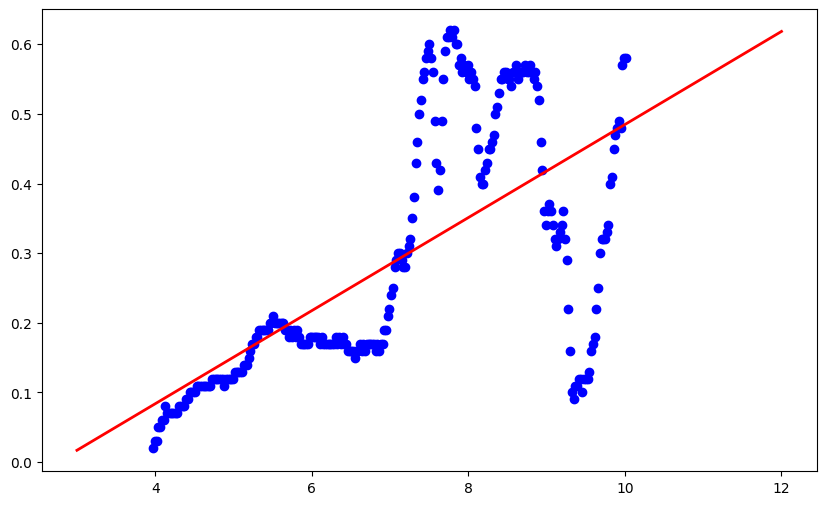

In [28]:
 2. Коэффициенты с использованием метода градиентного спуска
class SimpleRegressionGD:
    def __init__(self):
        self.a0 = np.random.rand()
        self.a1 = np.random.rand()

    def predict(self, x):
        return self.a0 + self.a1 * x

    def MSE(self, x, Y):
        predictions = self.predict(x)
        return np.nan_to_num(((Y - predictions) ** 2).mean())

    def fit(self, x, Y, alpha=0.00001, epsilon=0.01, max_steps=5000):
        steps, errors = [], []
        for step in range(max_steps):
            predictions = self.predict(x)
            dT_a0 = -2 * np.sum(Y - predictions)
            dT_a1 = -2 * np.sum((Y - predictions) * x)
            self.a0 -= alpha * dT_a0
            self.a1 -= alpha * dT_a1
            new_error = self.MSE(x, Y)
            if np.isnan(new_error) or np.isinf(new_error):
                print(f"Error is NaN or Inf at step {step}")
                break
            steps.append(step)
            errors.append(new_error)
            if new_error < epsilon:
                break
        return steps, errors

### 2

In [35]:
class SimpleRegressionGD:
    def __init__(self):
        self.a0 = np.random.rand()
        self.a1 = np.random.rand()

    def predict(self, x):
        return self.a0 + self.a1 * x

    def MSE(self, x, Y):
        predictions = self.predict(x)
        return np.nan_to_num(((Y - predictions) ** 2).mean())

    def fit(self, x, Y, alpha=0.00001, epsilon=0.01, max_steps=5000):
        steps, errors = [], []
        for step in range(max_steps):
            predictions = self.predict(x)
            dT_a0 = -2 * np.sum(Y - predictions)
            dT_a1 = -2 * np.sum((Y - predictions) * x)
            self.a0 -= alpha * dT_a0
            self.a1 -= alpha * dT_a1
            new_error = self.MSE(x, Y)
            if np.isnan(new_error) or np.isinf(new_error):
                print(f"Error is NaN or Inf at step {step}")
                break
            steps.append(step)
            errors.append(new_error)
            if new_error < epsilon:
                break
        return steps, errors

In [36]:

# Запуск градиентного спуска
regr_gd = SimpleRegressionGD()
steps, errors = regr_gd.fit(x_scaled, Y_scaled)

# Проверка результатов градиентного спуска
print(f'Коэффициенты после градиентного спуска: a0 = {regr_gd.a0}, a1 = {regr_gd.a1}')
print(f'Последний MSE: {regr_gd.MSE(x_scaled, Y_scaled)}')

# Прогнозы с использованием градиентного спуска
Y_pred_gd = regr_gd.predict(x_space_scaled)

# Обратное масштабирование для восстановления исходного масштаба
x_space = scaler_x.inverse_transform(x_space_scaled.reshape(-1, 1)).flatten()
Y_pred_analytic = scaler_Y.inverse_transform(Y_pred_analytic.reshape(-1, 1)).flatten()
Y_pred_gd = scaler_Y.inverse_transform(Y_pred_gd.reshape(-1, 1)).flatten()


x: 0       3.9732
1       3.9954
2       4.0176
3       4.0398
4       4.0620
        ...   
268     9.9228
269     9.9450
270     9.9672
271     9.9894
272    10.0116
Name: wavelength, Length: 273, dtype: float64 
y: 0      0.02
1      0.03
2      0.03
3      0.05
4      0.05
       ... 
268    0.49
269    0.48
270    0.57
271    0.58
272    0.58
Name: Spectr, Length: 273, dtype: float64


In [38]:
# 3. Построение графиков
plt.figure(figsize=(14, 7))

# График аналитической регрессии
plt.subplot(1, 2, 1)
plt.scatter(x, Y, color='blue', label='Исходные данные')
plt.plot(x_space, Y_pred_analytic, color='red', label='Аналитическая регрессия')
plt.title('Аналитическая регрессия')
plt.xlabel('Длина волны')
plt.ylabel('Спектр')
plt.legend()

# График регрессии градиентного спуска
plt.subplot(1, 2, 2)
plt.scatter(x, Y, color='blue', label='Исходные данные')
plt.plot(x_space, Y_pred_gd, color='green', label='Регрессия градиентного спуска')
plt.title('Регрессия градиентного спуска')
plt.xlabel('Длина волны')
plt.ylabel('Спектр')
plt.legend()

plt.tight_layout()
plt.show()


1
